# Unfixed Linear Regression with SGD

This notebook evaluates convergence behavior and generalization performance of SGD on synthetic linear data with randomly generated coefficients. We compare our three stepsize strategies — fixed, halving, and diminishing — using both training and test error over 20 randomized trials.


In [13]:
import sys
sys.path.append("..") 

import numpy as np
import matplotlib.pyplot as plt
from sgd_framework.sgd import SGD
from data.generate_synthetic_data import generate_training_data_fixed
from sgd_framework.regression_model import RegressionModel
from sklearn.model_selection import train_test_split

### Summary of Train/Test Error Over 20 Runs

We generate new synthetic data each time and report mean ± std of final losses.

In [14]:
X, y, true_params = generate_training_data_fixed(m=5000, n=2, noise=0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train_losses = {}
test_losses = {}
results = {}

for method in ["fixed", "halving", "diminishing"]:
    model = RegressionModel(X_train, y_train)
    sgd = SGD(model=model, num_iterations=5000, batch_size=1, noise=0.01, stepsize_type=method)
    w, obj, grad, dist = sgd.optimize()

    train_loss = obj[-1]
    train_losses[method] = train_loss

    test_pred = X_test @ w[1:] + w[0]
    test_loss = np.mean((test_pred - y_test) ** 2)
    test_losses[method] = test_loss

    results[method] = {
        "w": w,
        "obj": obj,
        "grad": grad,
        "dist": dist,
        "F_star": sgd.F_star,
        "params": sgd.params,
        "scheduler": sgd.scheduler
    }

# Print results
for method in ["fixed", "halving", "diminishing"]:
    print(f"\n{method.capitalize()} Results:")
    print(f"  Final Training Loss: {train_losses[method]:.4f}")
    print(f"  Final Testing Loss:  {test_losses[method]:.4f}")


Fixed Results:
  Final Training Loss: 0.0001
  Final Testing Loss:  0.0001

Halving Results:
  Final Training Loss: 0.0000
  Final Testing Loss:  0.0001

Diminishing Results:
  Final Training Loss: 0.0002
  Final Testing Loss:  0.0003


### Convergence Plots (Single Run)

Here, we show the distance to optimum, gradient norm, and suboptimality gap over 5000 iterations on one synthetic dataset.

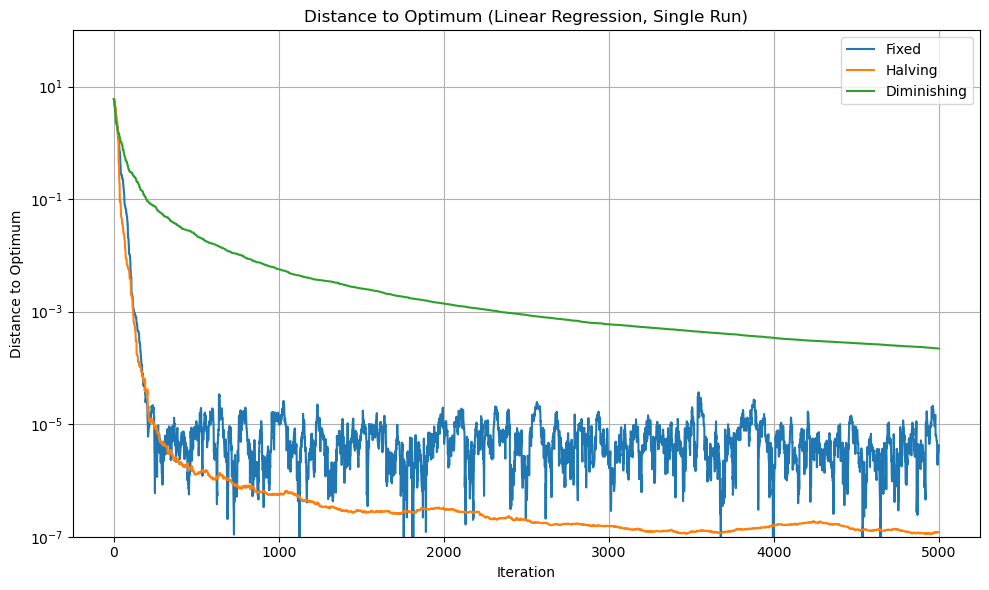

In [15]:
# Plot: Distance to optimum vs. iteration
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["dist"], label=method.capitalize())
plt.xlabel("Iteration")
plt.ylabel("Distance to Optimum")
plt.yscale("log")
plt.ylim(1e-7, 1e2)
plt.title("Distance to Optimum (Linear Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

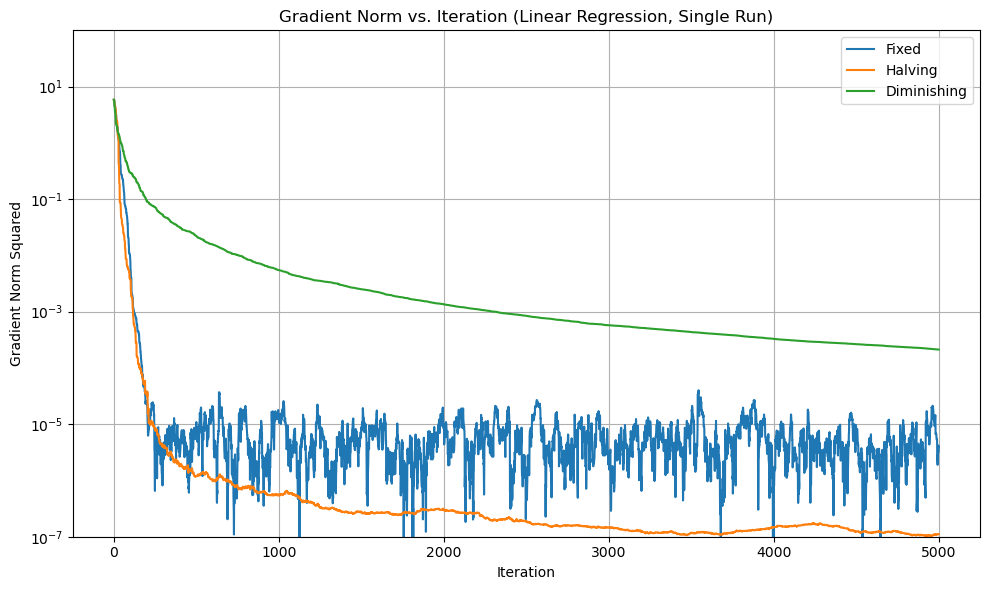

In [16]:
# Plot: Gradient norm
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["grad"], label=method.capitalize())  
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm Squared")
plt.yscale("log")
plt.ylim(1e-7, 1e2)
plt.title("Gradient Norm vs. Iteration (Linear Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

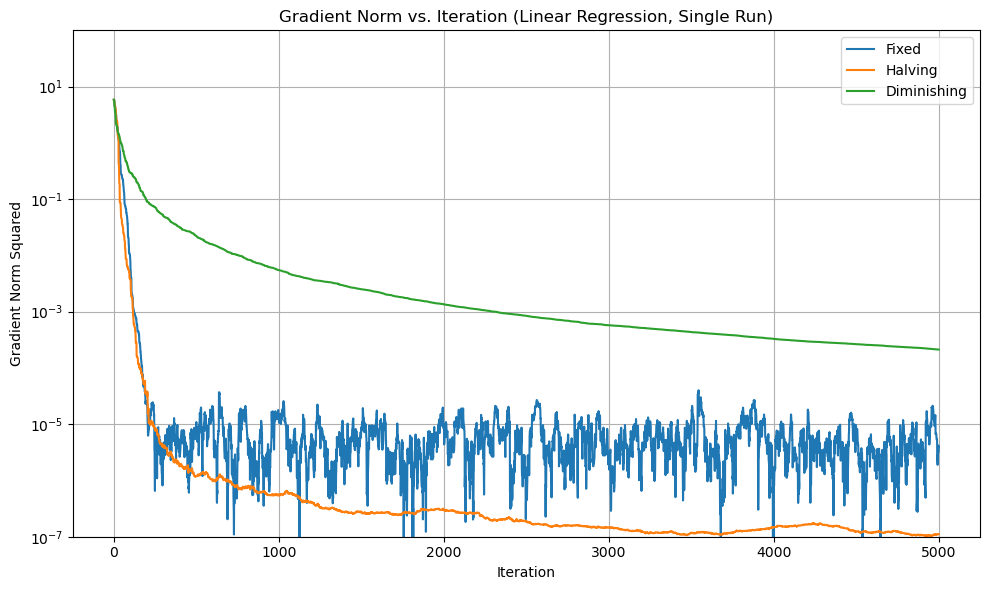

In [17]:
plt.figure(figsize=(10, 6))
for method in results:
    plt.plot(results[method]["grad"], label=method.capitalize())  
plt.xlabel("Iteration")
plt.ylabel("Gradient Norm Squared")
plt.yscale("log")
plt.ylim(1e-7, 1e2)
plt.title("Gradient Norm vs. Iteration (Linear Regression, Single Run)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Theoretical Constants

The following constants were computed from the problem to derive the various stepsizes.

In [18]:
# Summary of parameters and learned weights
print("\n" + "="*60)
print("True Parameters (used to generate synthetic data):")
print(f"A: {true_params['A']}")
print(f"b: {true_params['b']}")

print("\nLearned Parameters from Each Stepsize Strategy:")
print("-" * 60)
for method in results:
    w_method = results[method]["w"]
    print(f"{method.capitalize()} stepsize:")
    print(f"  Bias term (w_0): {w_method[0]:.4f}")
    print(f"  Weights (w_1, w_2): {w_method[1:]}")

print("\n" + "="*60)
print("Estimated Parameters from Each Stepsize Strategy:")
for method in results:
    print(f"\n{method.capitalize()} stepsize:")
    for k, v in results[method]["params"].items():
        print(f"  {k}: {v:.6f}")
        if method == "fixed":
            print(f"  Fixed stepsize (alpha): {results[method]['scheduler'].alpha:.6f}")
        elif method == "diminishing":
            print(f"  Diminishing stepsize (beta): {results[method]['scheduler'].beta:.6f}")
            print(f"  Diminishing stepsize (gamma): {results[method]['scheduler'].gamma:.6f}")
        elif method == "halving":
            print(f"  Initial halving stepsize (alpha): {results[method]['scheduler'].alpha:.6f}")


True Parameters (used to generate synthetic data):
A: [1. 2.]
b: 1.0

Learned Parameters from Each Stepsize Strategy:
------------------------------------------------------------
Fixed stepsize:
  Bias term (w_0): 0.9996
  Weights (w_1, w_2): [1.00192522 2.0010116 ]
Halving stepsize:
  Bias term (w_0): 1.0004
  Weights (w_1, w_2): [1.00006907 1.99977904]
Diminishing stepsize:
  Bias term (w_0): 0.9967
  Weights (w_1, w_2): [0.99481002 1.98666763]

Estimated Parameters from Each Stepsize Strategy:

Fixed stepsize:
  L: 1.065930
  Fixed stepsize (alpha): 0.034385
  c: 0.957017
  Fixed stepsize (alpha): 0.034385
  mu: 1.000000
  Fixed stepsize (alpha): 0.034385
  mu_G: 1.000000
  Fixed stepsize (alpha): 0.034385
  M: 0.000303
  Fixed stepsize (alpha): 0.034385
  M_V: 26.283759
  Fixed stepsize (alpha): 0.034385
  M_G: 27.283759
  Fixed stepsize (alpha): 0.034385

Halving stepsize:
  L: 1.065907
  Initial halving stepsize (alpha): 0.034386
  c: 0.957017
  Initial halving stepsize (alpha):